# Traffic Sign Classification 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [5]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [13]:
X_train, y_train = train['features'], train['labels']

X_valid, y_valid = valid['features'], valid['labels']

X_test, y_test = test['features'], test['labels']

In [14]:
X_train.shape, X_test.shape, X_valid.shape

((34799, 32, 32, 3), (12630, 32, 32, 3), (4410, 32, 32, 3))

In [11]:
y_train.shape, y_test.shape, y_valid.shape

((34799,), (12630,), (4410,))

# IMAGES VISUALIZATION

18

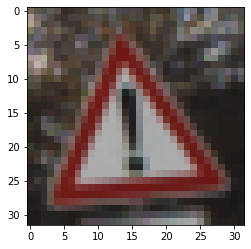

In [16]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

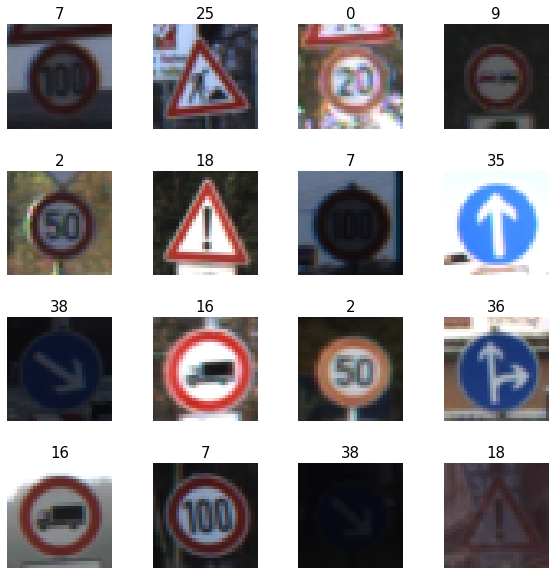

In [18]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 4
L_grid = 4

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 4 x 4 matrix into 16 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

#  CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [19]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [23]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

In [24]:
X_train_gray.shape, X_valid_gray.shape, X_test_gray.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

In [25]:
X_train_gray_norm = (X_train_gray-128)/128
X_valid_gray_norm = (X_valid_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128


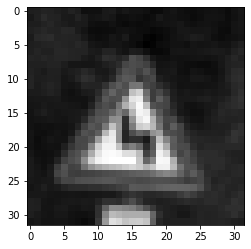

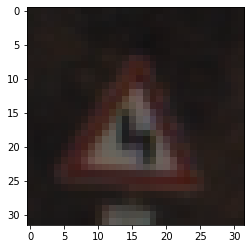

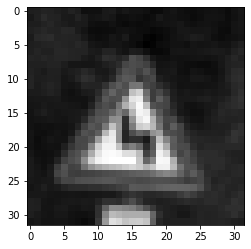

In [26]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# MODEL

In [29]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))

model.add (layers.AveragePooling2D())

model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(16, (5,5), activation = 'relu'))

model.add (layers.AveragePooling2D())



model.add(layers.Flatten())

model.add(layers.Dense(128, activation= 'relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(43, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 400)              

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_train_gray_norm ,
                    y_train, batch_size=50, epochs=20,
                    verbose=1, validation_data=(X_valid_gray_norm, y_valid)) 

Epoch 1/20
696/696 [==============================] - 4s 5ms/step - loss: 0.0825 - accuracy: 0.9755 - val_loss: 0.5415 - val_accuracy: 0.9043
Epoch 2/20
696/696 [==============================] - 4s 5ms/step - loss: 0.0798 - accuracy: 0.9748 - val_loss: 0.4890 - val_accuracy: 0.9136
Epoch 3/20
696/696 [==============================] - 4s 5ms/step - loss: 0.0693 - accuracy: 0.9783 - val_loss: 0.5417 - val_accuracy: 0.9156
Epoch 4/20
696/696 [==============================] - 4s 5ms/step - loss: 0.0673 - accuracy: 0.9787 - val_loss: 0.3934 - val_accuracy: 0.9136
Epoch 5/20
696/696 [==============================] - 4s 5ms/step - loss: 0.0596 - accuracy: 0.9826 - val_loss: 0.4302 - val_accuracy: 0.9163
Epoch 6/20
696/696 [==============================] - 4s 5ms/step - loss: 0.0526 - accuracy: 0.9832 - val_loss: 0.4480 - val_accuracy: 0.9066
Epoch 7/20
696/696 [==============================] - 4s 5ms/step - loss: 0.0534 - accuracy: 0.9829 - val_loss: 0.4722 - val_accuracy: 0.9032
Epoch 

# MODEL PERFORMANCE 

In [37]:
score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.5942 - accuracy: 0.9203
Test Accuracy: 0.9203484058380127


In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training & Validation Loss')

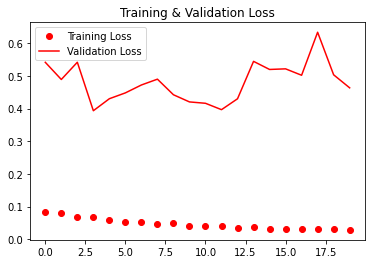

In [41]:
epochs = range(len(accuracy))

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend()
plt.title('Training & Validation Loss')

Text(0.5, 1.0, 'Training & Validation Accuracy')

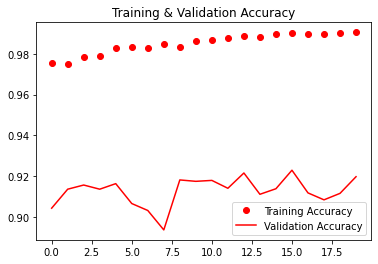

In [42]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

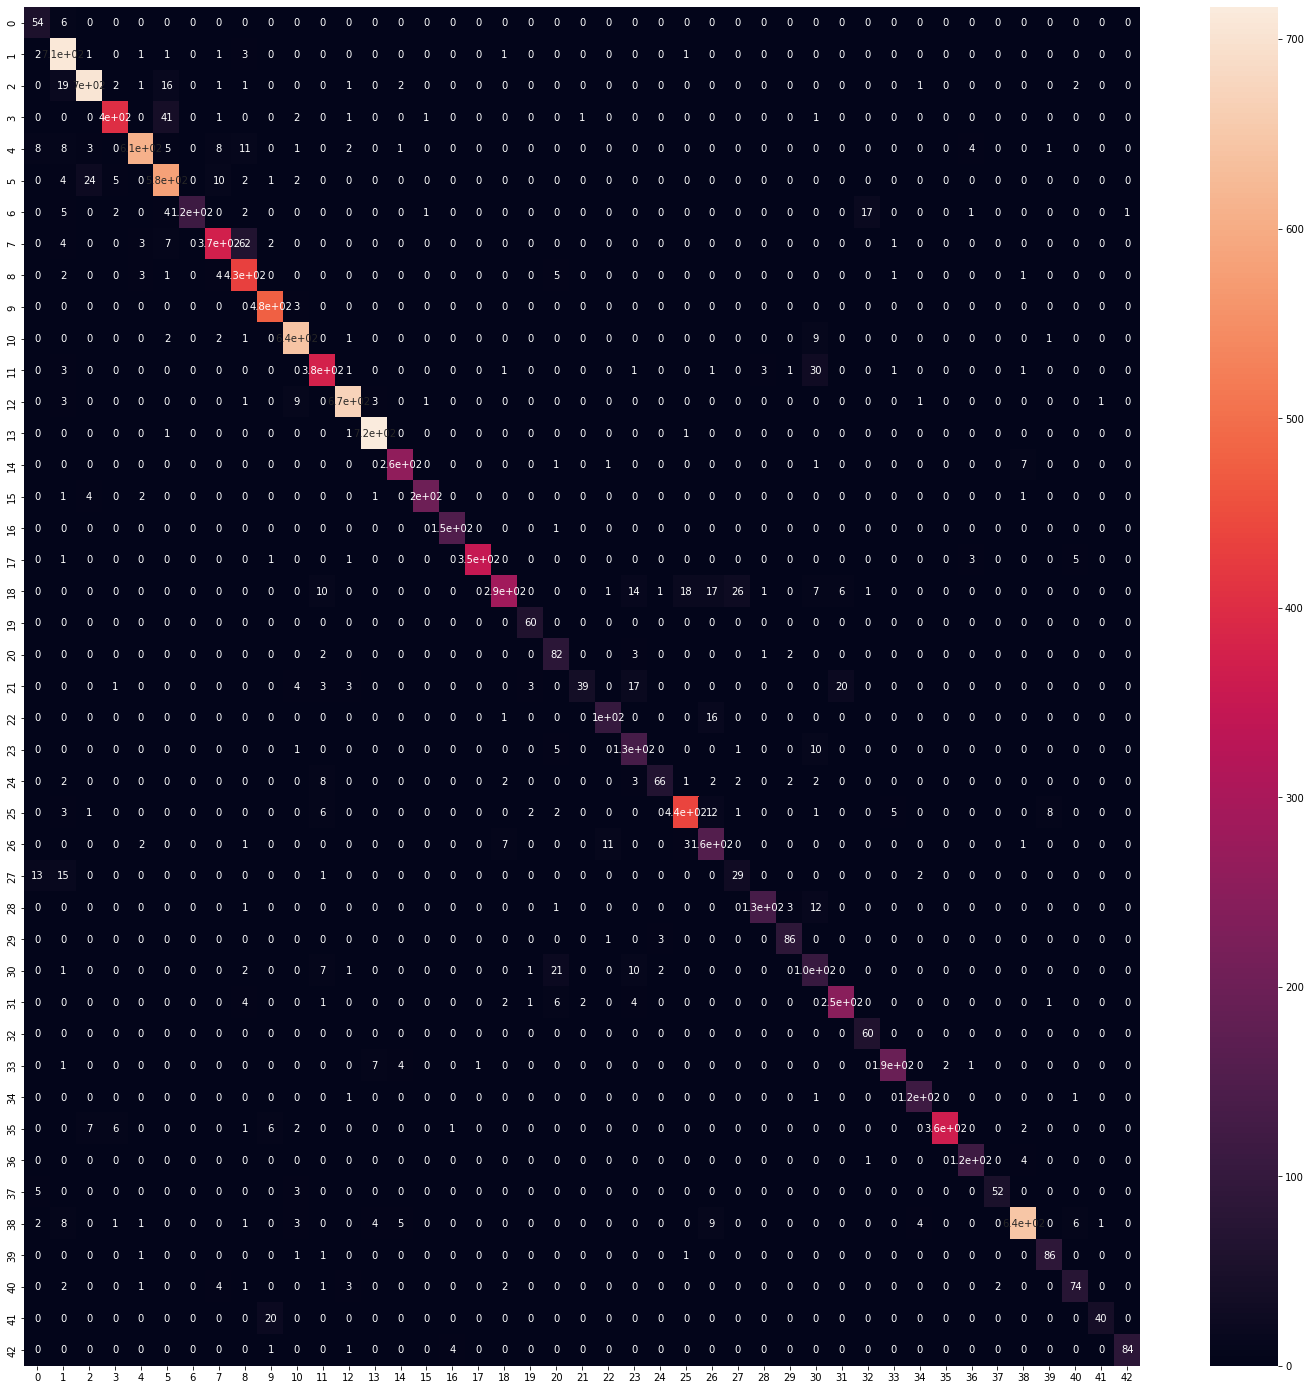

In [44]:
predicted_classes = np.argmax(model.predict(X_test_gray_norm), axis=-1)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

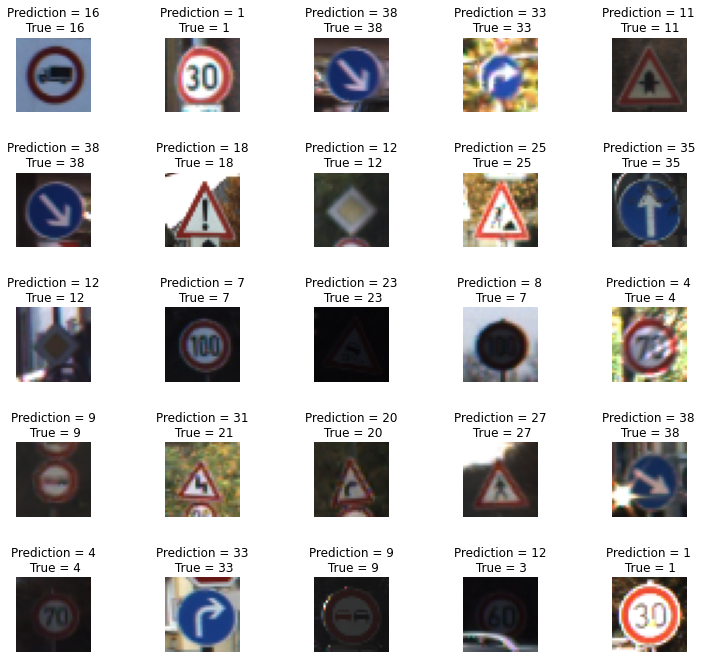

In [45]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons